# Phonon Dispersion

In [1]:
from pylab import *
from ase.lattice.cubic import Diamond
from ase.build import bulk
from thermo.gpumd.preproc import add_basis, repeat
from thermo.gpumd.io import create_basis, create_kpoints, ase_atoms_to_gpumd
from thermo.gpumd.data import load_omega2

## Build Silicon Structure

### Create Si Unit Cell & Add Basis

In [2]:
a=5.434
Si_UC = bulk('Si', 'diamond', a=a)
add_basis(Si_UC)
Si_UC

Atoms(symbols='Si2', pbc=True, cell=[[0.0, 2.717, 2.717], [2.717, 0.0, 2.717], [2.717, 2.717, 0.0]])

### Transform to Cubic Lattice

In [3]:
# Create 8 atom diamond structure
Si = repeat(Si_UC, [2,2,1])
Si.set_cell([a, a, a])
Si.wrap()

# Complete full supercell
Si = repeat(Si, [2,2,2])
Si

Atoms(symbols='Si64', pbc=True, cell=[10.868, 10.868, 10.868])

### Write Input Files

In [4]:
create_basis(Si)
linear_path, sym_points, labels = create_kpoints(Si_UC, path='GXKGL',npoints=400)
ase_atoms_to_gpumd(Si, M=4, cutoff=3)

# Process Results

### Figure Properties

In [5]:
aw = 2
fs = 24
font = {'size'   : fs}
matplotlib.rc('font', **font)
matplotlib.rc('axes' , linewidth=aw)

def set_fig_properties(ax_list):
    tl = 8
    tw = 2
    tlm = 4
    
    for ax in ax_list:
        ax.tick_params(which='major', length=tl, width=tw)
        ax.tick_params(which='minor', length=tlm, width=tw)
        ax.tick_params(which='both', axis='both', direction='in', right=True, top=True)

In [6]:
nu = load_omega2()

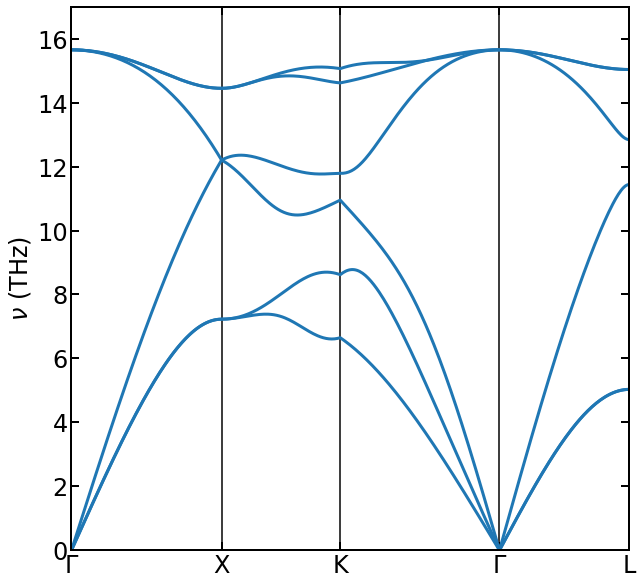

In [7]:
figure(figsize=(10,10))
set_fig_properties([gca()])
vlines(sym_points, ymin=0, ymax=17)
plot(linear_path, nu, color='C0',lw=3)
xlim([0, max(linear_path)])
gca().set_xticks(sym_points)
gca().set_xticklabels([r'$\Gamma$','X', 'K', r'$\Gamma$', 'L'])
ylim([0, 17])
ylabel(r'$\nu$ (THz)')
show()